#### CMSE 201 Final Project
### &#9989; Zhuoyan Bai
### &#9989; Section_002
#### &#9989; 11/26/2019

# ___Relationship between goal and shot___

## Background and Motivation

When I thought about my project topic, I got a news from my friend, that the 2022 Qatar FIFA World Cup is coming. And I heard some people discussed Ronaldo shot a lot, but got few scores and wasted too much chances. However, no one can deny Ronaldo is good player. Thus, I want to know the answer of some questions. **First is the relationship between goals and total shots.** Most people would say more shots means more goals. However, as I know, it is depened on the team strategy. Some players deem goal as combination of luck and skill. If the goalkeeper is too strong or too lucky, there will be little chance to goal, even if players try a lot. Thus, I think it should be more total shots on target means more goals. Thus, **the second question is the relationship between goals and total shots on target.**

## Methodology

In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from scipy.optimize import curve_fit
import random
from matplotlib.colors import LogNorm

To answer these questions, I use the match data of Premier League in 17/18 Season, which is one of five most professional soccer leagues. The following cells shows the chart of the relationship bewteen total shots and goals for both teams in every matches first. I decide to look at the total shot first to determine if more shots means more goals. If it is true I do not need to determine the relationship between on target shot and total goals next. For plot, I use sns.boxplot to help me understand the data better. The reason is that the number of goal is always between 0 and 5, but the range of shots is more wider and the data sample should be normal distribution. Boxplot gives me the average number and the quartile number. These numbers tells me that on certain shot number, what is the most likely goal is.

In [58]:
# open the data file and store the varibles
data=pd.read_csv('data.csv')

# find full time home team goals data and full time away team goals data
home_goal=data['FTHG']
away_goal=data['FTAG']

# find the total shots for home team and away team
home_shot=data['HS']
away_shot=data['AS']

# find the total number of home team shots on target and the one for away team
home_target=data['HST']
away_target=data['AST']

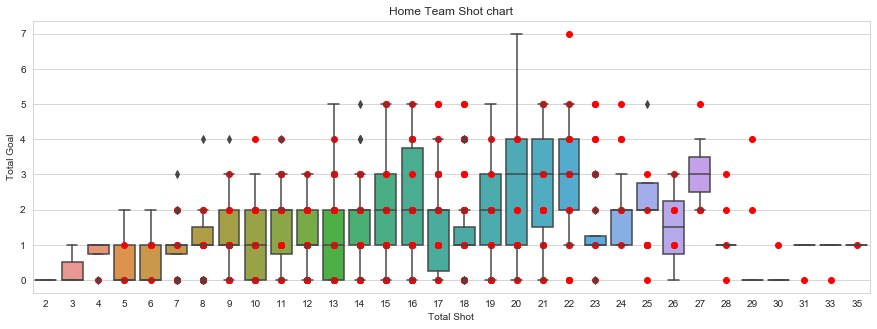

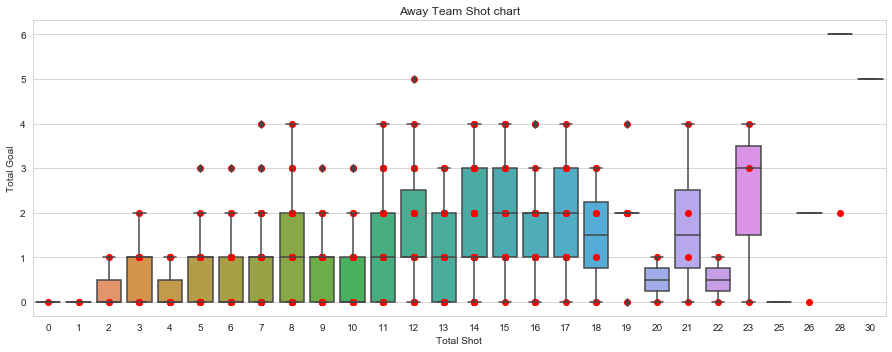

In [59]:
# set figure size
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")

# make a scatter plot to list the all data and use box plot to find the statistical information for the certain number of total shots
plt.scatter(home_shot,home_goal,color='red')
sns.boxplot(home_shot,home_goal)
plt.xlabel('Total Shot')
plt.ylabel('Total Goal')
plt.title('Home Team Shot chart')

plt.figure(figsize=(12.5,5))
plt.scatter(away_shot,away_goal,color='red')
sns.boxplot(away_shot,away_goal)
plt.xlabel('Total Shot')
plt.ylabel('Total Goal')
plt.title('Away Team Shot chart')

plt.tight_layout()

As we can see, with the number of total shot increasing, the total goal for both teams tends to increase. However, I also notice away team needs to try harder to get the goal. And when the number of shot is smaller than 5, the direct proportion relationship is stable. When the shot number greater than 5 and smaller than around 10, the goal is always constant, instead of incresing. This stabilization also occurs when the shot number is around between 12 and 18. Does it means when a team try harder, it also needs some luck to covert shot to goal? Thus, I use functions to determine the real relationship. The following steps shows how I use different functions and model, from linear to curve, to find a fitted model. After getting all model, I use chi square error to calculate which model is the best fitted one. I use home team to get the functions and use away team to test it.

Text(0.5, 1.0, 'Linear model')

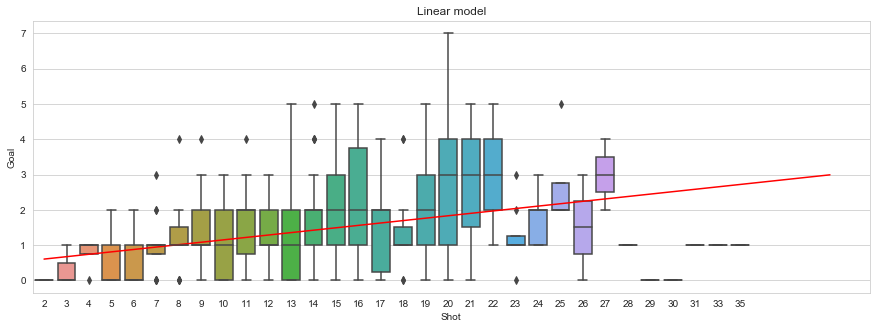

In [60]:
# this seems a linear line, I try it first
para_1 = np.polyfit(home_shot,home_goal,1)
line= np. poly1d(para_1)
shot=np.linspace(0,35,1000)
line_goal=line(shot)

# plot the data and compare with the line model
plt.figure(figsize=(15,5))
sns.boxplot(home_shot,home_goal)
plt.plot(shot,line_goal,color='r')
plt.xlabel('Shot')
plt.ylabel('Goal')
plt.title('Linear model')

Text(0.5, 1.0, '2 Degree model')

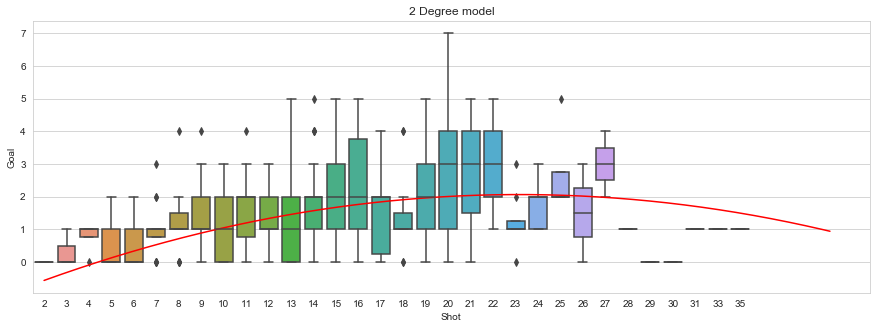

In [61]:
# The line did not cover most average points, then I decide to use 2 degree
para_2 = np.polyfit(home_shot,home_goal,2)
f2= np. poly1d(para_2)
f2_goal=f2(shot)

plt.figure(figsize=(15,5))
sns.boxplot(home_shot,home_goal)
plt.plot(shot,f2_goal,color='r')
plt.xlabel('Shot')
plt.ylabel('Goal')
plt.title('2 Degree model')

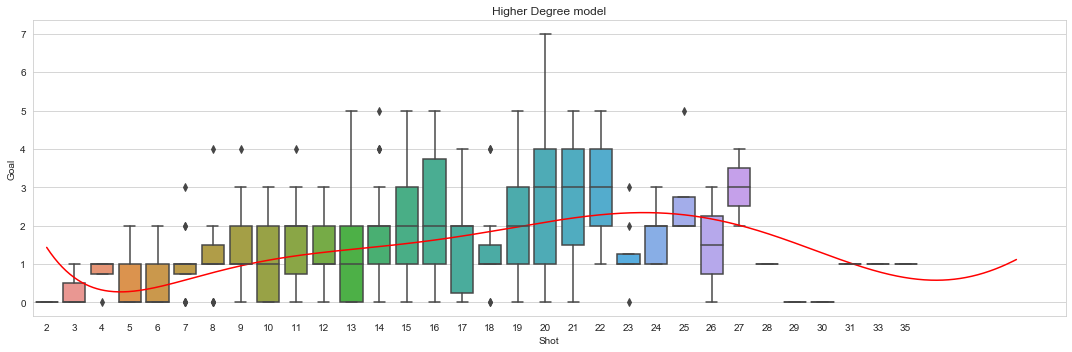

In [62]:
# Now I apply higher degree
para_3 = np.polyfit(home_shot,home_goal,7)
f3 = np. poly1d(para_3)
f3_goal=f3(shot)

plt.figure(figsize=(15,5))
sns.boxplot(home_shot,home_goal)
plt.plot(shot,f3_goal,color='r')
plt.xlabel('Shot')
plt.ylabel('Goal')
plt.title('Higher Degree model')
plt.tight_layout()

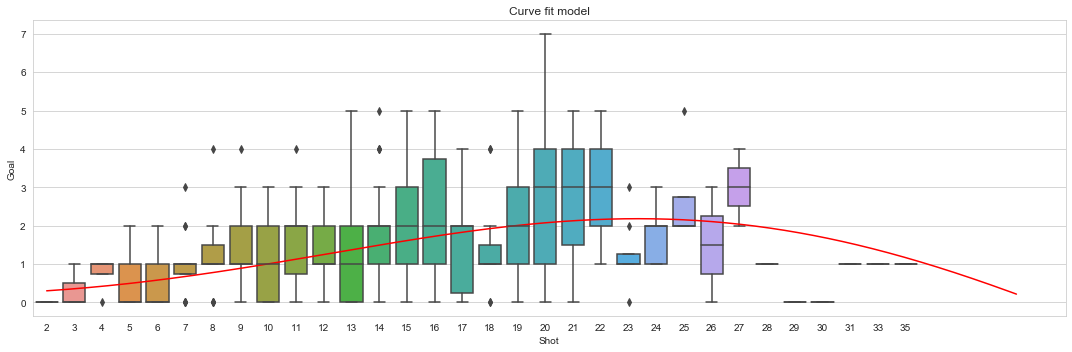

In [63]:
# After higher degree, I want to use curve fit to build a function that combines a second order polynomial and a sinusoidal function
def curve(x,A,B,C,D,E):
    return A*(x**2)+(B*x)+np.sin((C*x)+D)+E

a,b=curve_fit(curve,home_shot,home_goal,p0=(0,0,0,0.0,0.0))

curve_goal=curve(shot,a[0],a[1],a[2],a[3],a[4])

plt.figure(figsize=(15,5))
sns.boxplot(home_shot,home_goal)
plt.plot(shot,curve_goal,color='r')
plt.xlabel('Shot')
plt.ylabel('Goal')
plt.title('Curve fit model')
plt.tight_layout()

In [64]:
# Now using chi square error to calculate which one is the best model.

# for chi square, I need sigma. However I don't have it, and I decide to use the standard deviation of home_goal as sigma
sigma= np.std(home_goal)

# def chi square function for using later
def calculate_error(y_actual, y_model, sigma):
    """
    Calculate the chi-squared error between two sets of data
    """
    return ((y_actual-y_model)**2/(2*sigma**2)).sum()/(y_actual.size)



In [65]:
# set shot number and calculate error, then compare
shot_error=np.linspace(0,35,380)
f2_error=calculate_error(home_goal,f2(shot_error),sigma)
f3_error=calculate_error(home_goal,f3(shot_error),sigma)
curve_error=calculate_error(home_goal,curve(shot_error,a[0],a[1],a[2],a[3],a[4]),sigma)

print('2 degree model:','{:>15f}'.format(round(f2_error,5)),'\nhigher degree model:','{:>10f}'.format(round(f3_error,5)),'\ncurve fit model:''{:>15f}'.format(round(curve_error,5)))

2 degree model:        0.609570 
higher degree model:   0.586400 
curve fit model:       0.589900


As we see, the 7 degree polynomial model is the fittest one. Thus, I use this model for later test. Test if this model also works well on away team, or other model will be fitted.

Away Team chi square:   0.496750


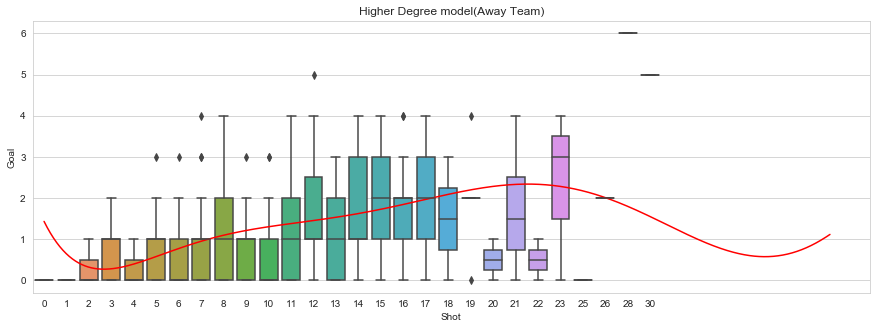

In [66]:
plt.figure(figsize=(15,5))
sns.boxplot(away_shot,away_goal)
plt.plot(shot,f3_goal,color='r')
plt.xlabel('Shot')
plt.ylabel('Goal')
plt.title('Higher Degree model(Away Team)')

f3_error=calculate_error(away_goal,f3(shot_error),sigma)


print('Away Team chi square:','{:>10f}'.format(round(f3_error,5)))

The model works on away team better than home team, this is surprise for me because I use home team to do research. Furthermore, all of the chi square error values are small, which means all models fit the data well, which is also surprise for me. Thus, I decide to find the relationship between shots on target and goal to check if all models are still fitted with data. I think this relationship can reveal how shots influence goal properly because if the goalkeeper cannot catch the ball, it would be a goal. Like what I did for total shots, I use linear, 2 degree, higher degree polynomial and curve fit to determine the relationship in following cells.

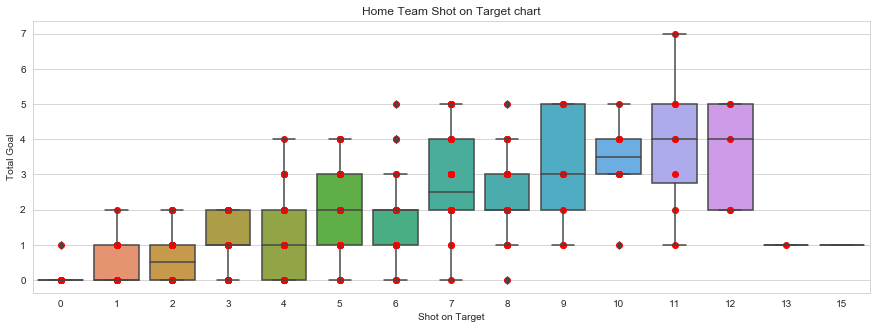

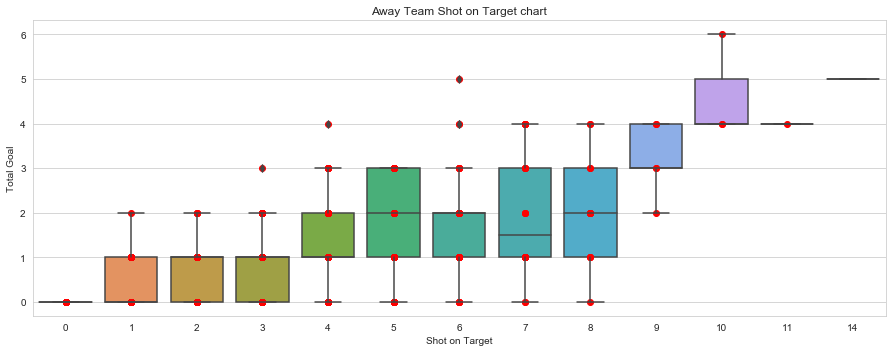

In [67]:
# make a scatter plot to list the all data and use box plot to find the statistical information for the certain number of total shots
plt.figure(figsize=(15,5))
plt.scatter(home_target,home_goal,color='red')
sns.boxplot(home_target,home_goal)
plt.xlabel('Shot on Target')
plt.ylabel('Total Goal')
plt.title('Home Team Shot on Target chart')

plt.figure(figsize=(12.5,5))
plt.scatter(away_target,away_goal,color='red')
sns.boxplot(away_target,away_goal)
plt.xlabel('Shot on Target')
plt.ylabel('Total Goal')
plt.title('Away Team Shot on Target chart')

plt.tight_layout()

[0.31490965 0.07470746]


Text(0.5, 1.0, 'Linear model')

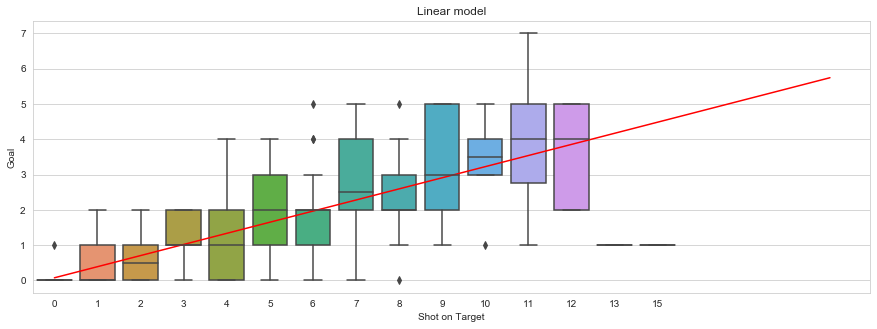

In [68]:
# Try linear model first. From the chart, shot on target looks more fitted with linear model than total shot
para_4 = np.polyfit(home_target,home_goal,1)
line_target= np. poly1d(para_4)
shot=np.linspace(0,18,1000)
line_goal2=line_target(shot)
print(para_4)
# plot the data and compare with the line model
plt.figure(figsize=(15,5))
sns.boxplot(home_target,home_goal)
plt.plot(shot,line_goal2,color='r')
plt.xlabel('Shot on Target')
plt.ylabel('Goal')
plt.title('Linear model')

Text(0.5, 1.0, '2 Degree model')

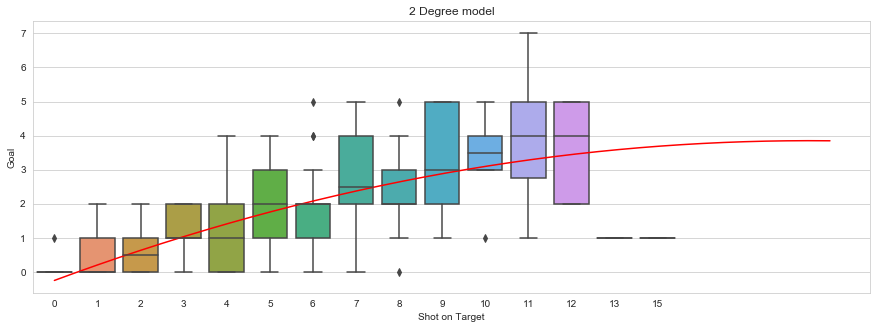

In [69]:
# linear model is good enough, it covers most average points. However, to make sure linear is the best, I still need to test the following polynomial function model
para_5 = np.polyfit(home_target,home_goal,2)
f22= np. poly1d(para_5)
f2_goal2=f22(shot)

plt.figure(figsize=(15,5))
sns.boxplot(home_target,home_goal)
plt.plot(shot,f2_goal2,color='r')
plt.xlabel('Shot on Target')
plt.ylabel('Goal')
plt.title('2 Degree model')

Text(0.5, 1.0, 'Higher Degree model')

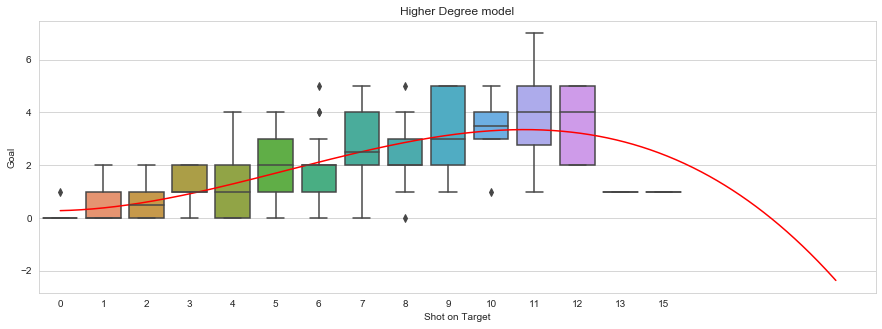

In [70]:
# Let's try higher degree model, I also make lots of experiments to determine the fit degree
para_6 = np.polyfit(home_target,home_goal,3)
f32 = np. poly1d(para_6)
f3_goal2=f32(shot)

plt.figure(figsize=(15,5))
sns.boxplot(home_target,home_goal)
plt.plot(shot,f3_goal2,color='r')
plt.xlabel('Shot on Target')
plt.ylabel('Goal')
plt.title('Higher Degree model')

-0.03114065456158984 0.6624804493662827 -45.192757058060444 -15.982539261231947 -0.5863024115577524


Text(0.5, 1.0, 'Curve fit model')

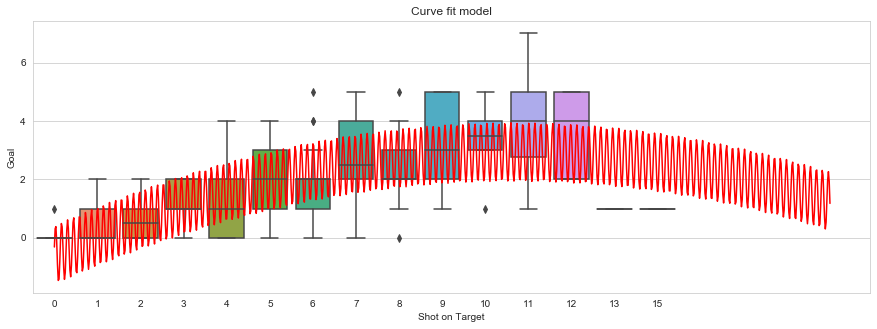

In [71]:
# higher degree function models always show with more shots on target, the goal number tends to decrease. I think this is unreasonable. Let's try curve_fit to test this hypothesis
def sin(x,A,B,C,D,E):
    return A*(x**2)+(B*x)+np.sin((C*x)+D)+E
popt,pcov=curve_fit(sin,home_target,home_goal,p0=(0,0,-45,-16,0))

curve_goal2=sin(shot,popt[0],popt[1],popt[2],popt[3],popt[4])
print(popt[0],popt[1],popt[2],popt[3],popt[4])
plt.figure(figsize=(15,5))
sns.boxplot(home_target,home_goal)
plt.plot(shot,curve_goal2,color='r')
plt.xlabel('Shot on Target')
plt.ylabel('Goal')
plt.title('Curve fit model')

In [72]:
# I change many value for popt[2] and popt[3], but I have no idea what these two parameter should be, so I use MCMC to find the best value
# I take 𝑛=1000000 steps and use a step size of 0.05
num_sample_points = 1000000
step_size = 0.05

# give the defalut to initial the parameter
c = [5]
C=5
d = [-15]
D=-15
A,B,E=-0.013044079374273033, 0.4644176509371814,-0.23981159305187144

# use MCMC to get the best number
shot_error2=np.linspace(0,18,380)
x=shot_error2.copy()
y=home_goal.copy()
y_model=sin(x,A,B,C,D,E)
chi0=calculate_error(y, y_model, sigma)

for j in range(num_sample_points):
    new_C=np.random.uniform(-1,1)*step_size+C
    new_D=np.random.uniform(-1,1)*step_size+D
    y_model=sin(x,A,B,new_C,new_D,E)
    chi=calculate_error(y, y_model, sigma)
    p=(np.e**((-1)*chi-(-1)*chi0))
    r=random.random()
    if r<p:
        C=new_C
        D=new_D
        chi0=chi
        c.append(C)
        d.append(D)
        
print(C,D)

69.22775765465288 -43.684047194159746


Text(0.5, 1.0, 'Markov Chain for estimate of optimal C, D')

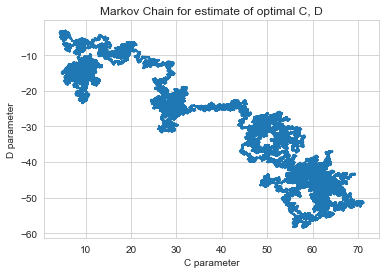

In [73]:
# This is plot of where your random walker "walked" in parameter space while it tried to find the best fit values
plt.plot(c, d)

plt.xlabel('C parameter')
plt.ylabel('D parameter')
plt.title('Markov Chain for estimate of optimal C, D')

Text(0.5, 0, 'C parameter')

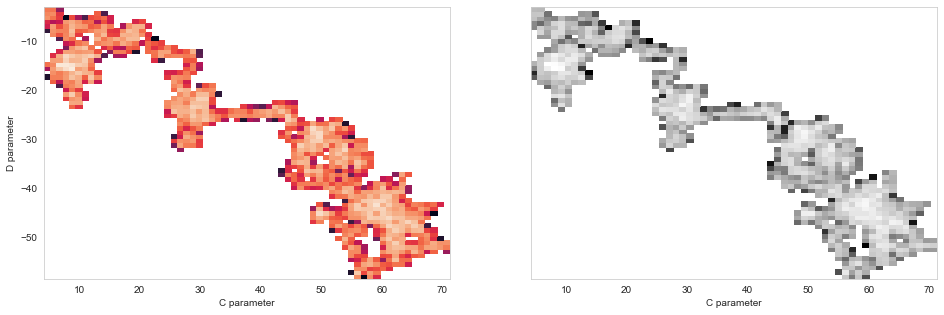

In [74]:
fig, [colored, bw] = plt.subplots(1,2, sharey=True, figsize = (16, 5))

counts, xbin, ybin, img = colored.hist2d(c, d, bins=64, norm=LogNorm())


# use np.argwhere() to find the bin(s) with the max counts
max_location = np.argwhere(counts == counts.max())

# Use the location of the max to find the best width and intercept parameters
best_c = xbin[max_location[0,0]]
best_d = ybin[max_location[0,1]]


bw.hist2d(c, d, bins=60, norm=LogNorm(), cmap='gray')


colored.set_xlabel("C parameter")
colored.set_ylabel("D parameter")
bw.set_xlabel("C parameter")

In [75]:
# Now, I want to know which model has the lowest chi square error value, which is the best model representing the relationship between shot on target and goals 

line_error=calculate_error(home_goal,line_target(shot_error2),sigma)
f22_error=calculate_error(home_goal,f22(shot_error2),sigma)
f32_error=calculate_error(home_goal,f32(shot_error2),sigma)
curve2_error=calculate_error(home_goal,sin(shot_error2,popt[0],popt[1],popt[2],popt[3],popt[4]),sigma)

print('linear model:','{:>15f}'.format(round(line_error,5)),'\n2 degree model:','{:>15f}'.format(round(f22_error,5)),'\nhigher degree model:','{:>10f}'.format(round(f32_error,5)),'\ncurve fit model:''{:>15f}'.format(round(curve2_error,5)))

linear model:        1.730220 
2 degree model:        1.146760 
higher degree model:   0.983340 
curve fit model:       0.902210


Away Team chi square:   0.959700


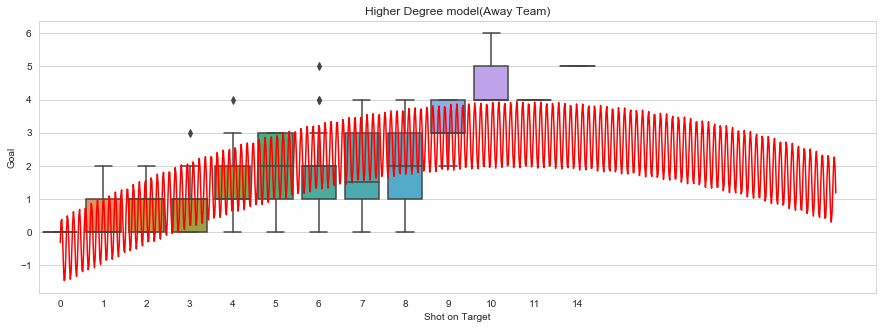

In [76]:
# from the home shot on target data, I notice the 2 degree polynomial function model is the best fitted

plt.figure(figsize=(15,5))
sns.boxplot(away_target,away_goal)
plt.plot(shot,curve_goal2,color='r')
plt.xlabel('Shot on Target')
plt.ylabel('Goal')
plt.title('Higher Degree model(Away Team)')

away_error=calculate_error(away_goal,sin(shot_error2,popt[0],popt[1],popt[2],popt[3],popt[4]),sigma)

print('Away Team chi square:','{:>10f}'.format(round(away_error,5)))

## Results

## Shot VS Goal

In the first model, we can check the relationship between the total shot number and the goal number. With my many experiments to find the best model, I find the 7 degree polynomial model is the fittest model with the smallest chi square error value, though I recognize the others are also good and chi square error are also small. And the chi square error value for home team and the function are showing below.  

In [77]:
# I ignore the linear model because it is far away from the data set
print('The higher degree polynomial function is: \ny={}*x^7+{}*x^6+{}*x^5+{}*x^4+{}*x^3+{}*x^2+{}*x+{}'.format(para_3[0],para_3[1],para_3[2],para_3[3],para_3[4],para_3[5],para_3[6],para_3[7])) 
print('\n2 degree model:','{:>15f}'.format(round(f2_error,5)),'\nhigher degree model:','{:>10f}'.format(round(f3_error,5)),'\ncurve fit model:''{:>15f}'.format(round(curve_error,5)))

The higher degree polynomial function is: 
y=-1.6482450448021156e-08*x^7+2.2587264029356207e-06*x^6+-0.00012156492791925466*x^5+0.0032824803763660455*x^4+-0.04730452499510237*x^3+0.35405171731208773*x^2+-1.0992053422805421*x+1.4336452869574066

2 degree model:        0.609570 
higher degree model:   0.496750 
curve fit model:       0.589900


In the second model, we can check the relationship between the total shot on target number and the goal number. With my many experiments to find the best model, I find the curve fit model is the fittest model with the smallest chi square error value, though I recognize the others are also good and chi square error are also small, around 1.0. And the chi square error value for home team and the function are showing below.

In [78]:
print('The curve_fit model function is : \ny={}*x^2+({}*x)+sin({}*x{}){}'.format(popt[0],popt[1],popt[2],popt[3],popt[4]))

print('\nlinear model:','{:>15f}'.format(round(line_error,5)),'\n2 degree model:','{:>15f}'.format(round(f22_error,5)),'\nhigher degree model:','{:>10f}'.format(round(f32_error,5)),'\ncurve fit model:''{:>15f}'.format(round(curve2_error,5)))

The curve_fit model function is : 
y=-0.03114065456158984*x^2+(0.6624804493662827*x)+sin(-45.192757058060444*x-15.982539261231947)-0.5863024115577524

linear model:        1.730220 
2 degree model:        1.146760 
higher degree model:   0.983340 
curve fit model:       0.902210


These two models answer my questions,relationship between goals and total shots and relationship between goals and total shots on target.

## Discussion and Conclusion

## Result
For my first question, shot VS goal, the relationship is based on the function, y=-1.6482450448021156e-08*x^7+2.2587264029356207e-06*x^6+-0.00012156492791925466*x^5+0.0032824803763660455*x^4+-0.04730452499510237*x^3+0.35405171731208773*x^2+-1.0992053422805421*x+1.4336452869574066. X, independent variable, is the number of shot, while Y, dependent variable, is the number of goal. With the increase of shot, the goal increases roughly 6% for every 1 goal increase in shot. However, after the 25th shot, the goal probility decreases which means goals need efficient shots. It does not mean more shots equal more shots.

For this reason, the second model is elicited, shot on target VS goal. The fitted function for this model is a 2 degree polynomial function combined with sin function, y=-0.03114065456158984*x^2+(0.6624804493662827*x)+sin(-45.192757058060444*x-15.982539261231947)-0.5863024115577524, where X, independent variable, is the number of shot on target, while Y, dependent variable, is the number of goal. Like a quadratic function, it is a curve, and the symmetry line is 11. When the shot on target number is smaller than 11, with one more shot on target, the goal will increase roughly 0.3 goal. Furthermore, when shot number is greater than 11, goal number tends to decrease roughly 3% for increase in shot on target. It shows even if there are 15 or more shot on target, it does not mean the team gets 5 or more goal. This is the same as the relationship between shot number and goal number. The team needs to focus on efficient shots.

And I find something interesting. First, comparing with home team, for shot VS goal model, the away team data is fitter with the model. On the contray, for shot on target VS goal model, the away team data is no longer fitter than home team. And the data shows away team gets less opportunities or has less shots than home team on average. Hence, I think the intense enthusiasm in home stadium can influence performance of players. They try to shot more. Second, I use standard deviation of home_goal as sigma, which leads small chi square error value for all model I tried. This is so surprised for me. At the beginning, I think the internal relationship between goal and shot is complexing and hard to explain. This is also an obstacle for me.

## Obstacle
After getting the shot VS goal chi sqaure error, I think the reason why the value is small is the sample size. However, when I get the value from shot on target VS goal, I realize there must be wrong. After review the data, I get the true reason. Goal is included in shots. Thus, I think the possibility of goal is a better way to explore the model, instead of the number of goal. However, if I use possibility, the chi square error test is no long available. I try to use binomial probability test, but I have trouble for defining the test function. If I have chance to do this project next time, I will use binomial probability test as the test to test the fittest model. 

Second obstacle is the parameter used. Because of the uncertainty of the curve_fit model, I try to find the best defined function as the basic model, but I hardly find a fitted function. Thus, I recall the sin function in HW6, which one I used. When I set the default parameter value, I do not which number I should use. I even build a MCMC model to find it with 20000000 steps. However, it gives lots of different value, and most value is bad guess leading larger chi square error. Even finishing this project, I still want to run it again to find the better parameters value.  

### References

Christian Rønsholt  "Premier League 17/18 Season--Results of all Premier League games in 17/18 season"
https://www.kaggle.com/cronsholt/premier-league-1718-dataset